In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
# Cargar datos
df2 = pd.read_excel('demanda2.xlsx')

# Diccionario para traducir los nombres de los meses de español a inglés
meses_es_en = {
    'Enero': 'January', 'Febrero': 'February', 'Marzo': 'March', 'Abril': 'April',
    'Mayo': 'May', 'Junio': 'June', 'Julio': 'July', 'Agosto': 'August',
    'Septiembre': 'September', 'Octubre': 'October', 'Noviembre': 'November', 'Diciembre': 'December'
}

# Convertir el DataFrame al formato deseado
df_melted = df2.melt(id_vars=['Año'], var_name='Mes', value_name='y')

# Traducir los meses
df_melted['Mes'] = df_melted['Mes'].map(meses_es_en)

# Crear la columna de fechas
df_melted['ds'] = pd.to_datetime(df_melted['Año'].astype(str) + '-' + df_melted['Mes'], format='%Y-%B')

# Seleccionar solo las columnas necesarias
df_final = df_melted[['ds', 'y']]

# Ordenar por fecha
df_final = df_final.sort_values(by='ds').reset_index(drop=True)

# Mostrar resultado
print(df_final.head())

          ds       y
0 2000-01-01  1032.5
1 2000-02-01  1035.5
2 2000-03-01  1014.8
3 2000-04-01  1083.0
4 2000-05-01  1002.6


23:33:41 - cmdstanpy - INFO - Chain [1] start processing
23:33:41 - cmdstanpy - INFO - Chain [1] done processing


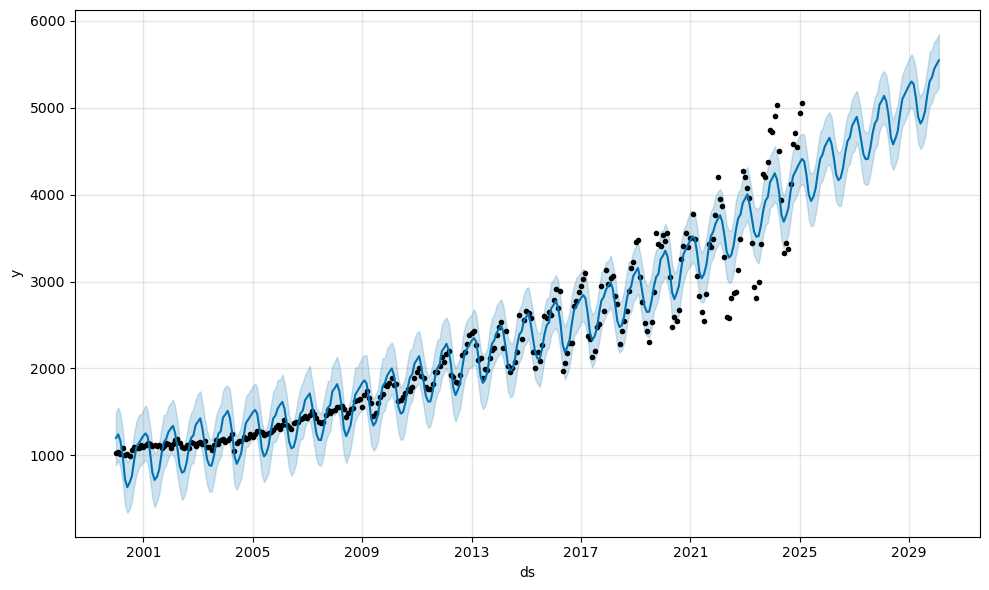

In [3]:
m = Prophet()
m.fit(df_final)
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

23:33:43 - cmdstanpy - INFO - Chain [1] start processing
23:33:43 - cmdstanpy - INFO - Chain [1] done processing


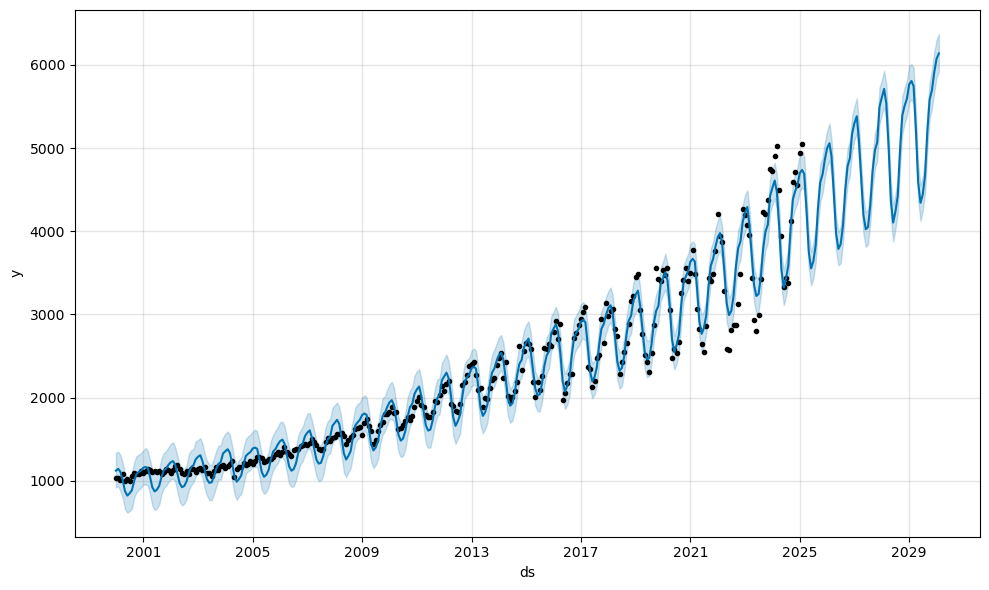

In [4]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df_final)
forecast = m.predict(future)
fig = m.plot(forecast)